## ARIMA predicting stock prices

ARIMA predict stock prices --> convert to volatility

In [1]:
import datetime as dt
import sys
import numpy as np
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn
import pandas as pd
from pandas_datareader import data as web
import seaborn as sns
from pylab import rcParams 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from arch import arch_model
from numpy.linalg import LinAlgError
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot, moment
from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal
from sklearn.model_selection import TimeSeriesSplit
import warnings
import yfinance as yf
import keras

In [2]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

Before 2021 train

After 2021 predict

Loading data

Sampling stocks from each of 6 company cap sizes

Building ARIMA

In [6]:
# for cap in range(len(stocks_smp)):
#     for stock in cap:
#         # loading stock price data
#         df_stock = yf.download(stock, start="2010-01-01", end="2021-04-30")
#         # calculate daily logarithmic return
#         df_stock['Return'] = (np.log(df_stock.Close /
#             df_stock.Close.shift(-1)))
#         df_stock = df_stock[:-1]
#         # calculate daily standard deviation of returns
#         daily_std = np.std(df_stock.Return)
#         # annualized daily standard deviation
#         std = daily_std * 252 ** 0.5
        
#         # split training and test set

In [37]:
def arima_prediction(train_data, test_data):
    # Create list of x train values
    history = [x for x in np.array(train_data.Close)]
    # establish list for predictions
    model_predictions = []

    # Count number of test data points
    N_test_observations = len(test_data)

    # loop through every data point
    for time_point in list(test_data.Date):
        model = ARIMA(history, order=(1,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0][0]
        model_predictions.append(yhat)
        true_test_value = float(test_data[test_data.Date == time_point].Close)
        history.append(true_test_value)
#     MAE_error = keras.metrics.mean_absolute_error(x_test, model_predictions).numpy()
#     MAPE_error = mean_absolute_percentage_error(x_test, model_predictions)
#     print('Testing Mean Squared Error is {}'.format(MAE_error))
#     print('Testing Mean Average Percentage Error is {}'.format(MAPE_error))
#     %store model_predictions
    model_predictions = np.diff(np.array(model_predictions)) / np.array(model_predictions)[1:]
    return model_predictions

toy example

In [14]:
start_date="2018-01-01"
end_date="2021-12-31"
cut_date = '2021-01-01'
aapl = yf.download("AAPL", start=start_date, end=end_date,progress=False).reset_index().dropna()
googl = yf.download("GOOGL", start=start_date, end=end_date,progress=False).reset_index().dropna()

In [5]:
googl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1053.020020,1075.979980,1053.020020,1073.209961,1073.209961,1588268
1,2018-01-03,1073.930054,1096.099976,1073.430054,1091.520020,1091.520020,1565945
2,2018-01-04,1097.089966,1104.076538,1094.260010,1095.760010,1095.760010,1302569
3,2018-01-05,1103.449951,1113.579956,1101.795044,1110.290039,1110.290039,1512526
4,2018-01-08,1111.000000,1119.160034,1110.000000,1114.209961,1114.209961,1232221
...,...,...,...,...,...,...,...
989,2021-12-06,2860.810059,2877.050049,2803.000000,2863.100098,2863.100098,1530905
990,2021-12-07,2911.929932,2950.623291,2904.550049,2945.389893,2945.389893,1612015
991,2021-12-08,2951.929932,2967.860107,2928.120117,2963.729980,2963.729980,1182594
992,2021-12-09,2951.820068,2982.000000,2942.300049,2952.770020,2952.770020,1139828


In [39]:
train_data, test_data = googl[googl.Date<cut_date],googl[googl.Date>=cut_date]

model_input = train_data.dropna()
actual_values = test_data.dropna()

prediction = arima_prediction(model_input, actual_values)

true_values = np.diff(np.array(actual_values.Close)) / np.array(actual_values.Close)[1:]

/Users/yiwen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


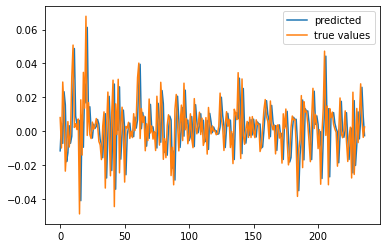

In [41]:
plt.plot(prediction, label = 'predicted')
plt.plot(true_values, label = 'true values')
plt.legend()

In [40]:
pd.DataFrame({'pred': prediction, 'true':true_values})

,pred,true
0,-0.011659,0.008000
1,0.004553,-0.009966
2,-0.007267,0.029002
3,0.023283,0.013066
4,0.015510,-0.023652
...,...,...
232,-0.004599,0.008058
233,0.006453,0.027939
234,0.025894,0.006188
235,0.008517,-0.003712


In [42]:
pd.DataFrame({'pred': prediction, 'true':true_values}).to_csv('arima_googl.csv')